In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
print("Shape of dataset:", df.shape)
df.info()

Shape of dataset: (319795, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  ob

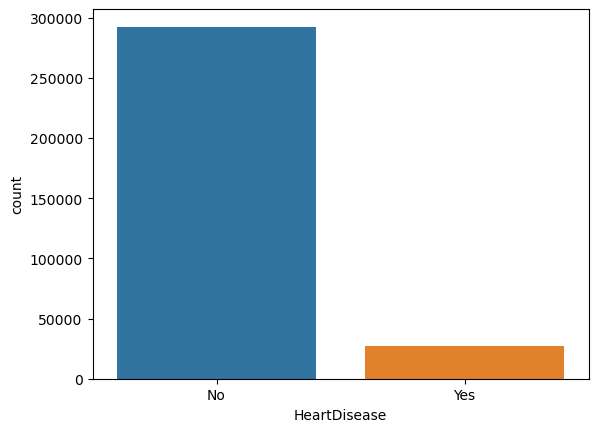

In [4]:
sns.countplot(x=df['HeartDisease'])
plt.show()

In [5]:
print("Ratio of count of class 'No' to class 'Yes':", len(df[df['HeartDisease']=='No'])/len(df[df['HeartDisease']=='Yes']))

Ratio of count of class 'No' to class 'Yes': 10.682862674898622


In [6]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 245212,
 'Hispanic': 27446,
 'Black': 22939,
 'Other': 10928,
 'Asian': 8068,
 'American Indian/Alaskan Native': 5202}

<AxesSubplot:xlabel='Race', ylabel='count'>

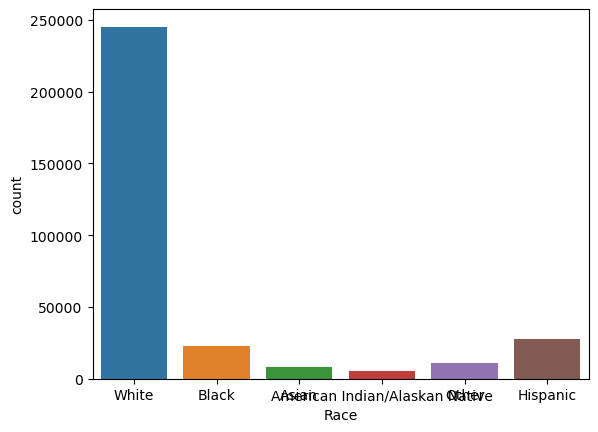

In [7]:
sns.countplot(x = df["Race"])

In [8]:
total = 0
nonwhite = 0

for race, num in counts.items():
    if race != "White":
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.23322128238402726


In [9]:
num_races = len(counts.items())

target_dist_1 = np.array([1 - (percent_nonwhite)] + [percent_nonwhite / (num_races - 1) for i in range (num_races - 1)])
target_dist_1

array([0.76677872, 0.04664426, 0.04664426, 0.04664426, 0.04664426,
       0.04664426])

In [10]:
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

In [11]:
counts.keys()

dict_keys(['White', 'Hispanic', 'Black', 'Other', 'Asian', 'American Indian/Alaskan Native'])

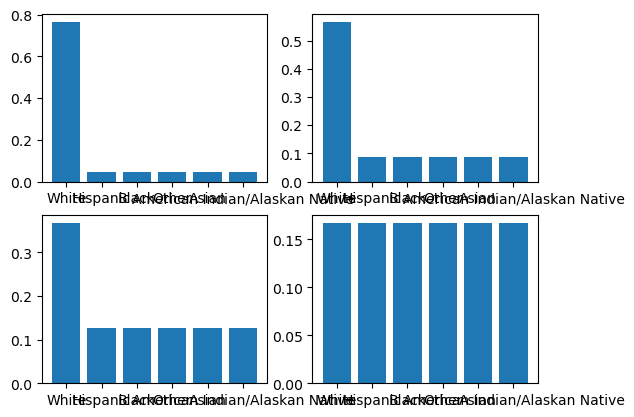

In [12]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

# Remove Duplicates

In [13]:
print("Initial shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

Initial shape: (319795, 18)
Duplicates in dataset: 18078


In [14]:
df.drop_duplicates(inplace=True)

print("New shape:", df.shape)
print("Duplicates in dataset:", df.duplicated().sum())

New shape: (301717, 18)
Duplicates in dataset: 0


In [15]:
counts = df['Race'].value_counts()
counts = dict(counts)
counts

{'White': 227724,
 'Hispanic': 27107,
 'Black': 22810,
 'Other': 10891,
 'Asian': 7993,
 'American Indian/Alaskan Native': 5192}

In [16]:
total = 0
nonwhite = 0

for race, num in counts.items():
    if race != "White":
        nonwhite += num
    total += num

percent_nonwhite = float(nonwhite) / total
print (percent_nonwhite)

0.24523974452881342


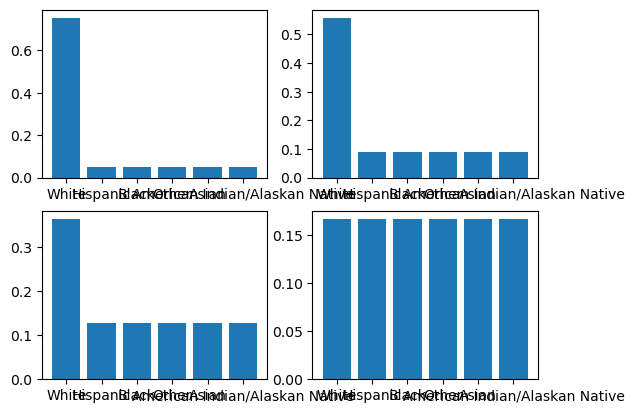

In [17]:
num_races = len(counts.items())

target_dist_1 = np.array([1 - (percent_nonwhite)] + [percent_nonwhite / (num_races - 1) for i in range (num_races - 1)])
target_dist_4 = np.array([1.0 / num_races for i in range (num_races)])

target_dist_2 = (target_dist_1 * 2 + target_dist_4) / 3
target_dist_3 = (target_dist_1 + target_dist_4 * 2) / 3

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

ax1.bar(counts.keys(), target_dist_1)
ax2.bar(counts.keys(), target_dist_2)
ax3.bar(counts.keys(), target_dist_3)
ax4.bar(counts.keys(), target_dist_4)

plt.show()

In [18]:
df[df["Race"] == "Asian"]

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
69,No,40.00,No,No,No,0.0,0.0,No,Male,60-64,Asian,Yes,No,Good,6.0,No,No,No
160,No,17.71,No,No,No,0.0,10.0,No,Female,65-69,Asian,No,Yes,Good,6.0,No,No,No
405,No,25.80,No,No,No,0.0,0.0,No,Male,50-54,Asian,No,No,Very good,7.0,No,No,No
856,No,25.61,No,No,No,0.0,0.0,No,Female,60-64,Asian,Yes,Yes,Good,7.0,No,No,No
1087,Yes,20.36,No,No,No,10.0,0.0,Yes,Male,70-74,Asian,No,No,Fair,5.0,Yes,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315402,No,25.61,No,No,No,30.0,0.0,No,Female,60-64,Asian,No,Yes,Poor,6.0,No,Yes,No
315404,No,23.83,No,No,No,0.0,0.0,No,Female,70-74,Asian,No,No,Very good,8.0,No,No,No
315707,No,29.39,No,No,No,0.0,0.0,No,Male,65-69,Asian,No,Yes,Fair,7.0,No,No,No
317066,No,24.03,No,Yes,No,0.0,20.0,No,Female,18-24,Asian,No,Yes,Excellent,8.0,Yes,No,No


In [19]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [20]:
['Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 
       'Asthma', 'KidneyDisease', 'SkinCancer']

['Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer']

# Encoding

In [21]:
from sklearn.preprocessing import LabelEncoder

data=df.copy()
le = LabelEncoder()

col = data[['HeartDisease', 'Smoking', 'AlcoholDrinking','AgeCategory', 'Stroke', 'DiffWalking','Race', 'Sex','PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth' ,'Diabetic']]
for i in col:
    data[i] = le.fit_transform(data[i])
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,2,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,2,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,0,1,4,8.0,0,0,0


# Standardization

In [22]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

continuous_vars=df.select_dtypes('float64').columns
cols = list(continuous_vars)
data[cols] = std_scaler.fit_transform(data[cols])

data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,-1.830820,1,0,0,-0.070301,3.183766,0,0,7,5,2,1,4,-1.420852,1,0,1
1,0,-1.252600,0,0,1,-0.438823,-0.507054,0,0,12,5,0,1,4,-0.057636,0,0,0
2,0,-0.287869,1,0,0,2.017986,3.183766,0,1,9,5,2,1,1,0.623971,1,0,0
3,0,-0.654281,0,0,0,-0.438823,-0.507054,0,0,11,5,0,0,2,-0.739244,0,0,1
4,0,-0.731583,0,0,0,3.000709,-0.507054,1,0,4,5,0,1,4,0.623971,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,-0.159547,1,0,0,0.421060,-0.507054,1,1,8,3,2,0,1,-0.739244,1,0,0
319791,0,0.216141,1,0,0,-0.438823,-0.507054,0,1,3,3,0,1,4,-1.420852,1,0,0
319792,0,-0.649643,0,0,0,-0.438823,-0.507054,0,0,5,3,0,1,2,-0.739244,0,0,0
319793,0,0.675316,0,0,0,-0.438823,-0.507054,0,0,1,3,0,0,2,3.350402,0,0,0


In [23]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [24]:
training_data.size, testing_data.size

(4344714, 1086192)

## Train Test Split

In [25]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(data, test_size=0.2)

In [26]:
training_data.reset_index(inplace=True, drop=True)
training_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,1.593666,0,0,0,-0.438823,-0.507054,0,0,9,5,0,1,0,-0.739244,0,0,0
1,1,0.642849,1,0,0,3.246390,3.183766,1,0,5,3,2,0,3,-1.420852,1,1,0
2,0,-0.071423,1,0,0,-0.438823,-0.507054,0,1,9,5,0,1,4,0.623971,0,0,0
3,0,1.267451,1,0,0,-0.438823,-0.507054,1,1,10,5,1,0,1,-0.057636,0,0,0
4,0,-0.590893,0,0,0,-0.193142,-0.507054,0,0,7,5,0,1,4,0.623971,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241368,0,-0.626452,1,0,0,-0.438823,-0.507054,0,1,2,4,0,1,4,-0.057636,1,0,0
241369,0,-0.974312,0,1,0,-0.315982,3.060739,0,0,1,1,0,1,4,-0.057636,0,0,0
241370,0,1.998730,0,0,0,0.298220,0.231110,0,1,0,4,0,0,2,-0.739244,0,0,0
241371,0,-0.948029,1,0,0,-0.438823,3.183766,0,0,9,5,0,1,2,-0.739244,0,0,1


In [27]:
testing_data.reset_index(inplace=True, drop=True)
testing_data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,0.072359,0,0,0,-0.438823,-0.507054,0,1,10,3,2,1,0,0.623971,0,0,0
1,0,-1.028423,0,0,0,-0.438823,-0.507054,0,0,10,5,0,0,4,0.623971,0,0,0
2,1,-1.070167,1,1,0,3.246390,1.338356,1,1,11,5,2,0,3,-2.784067,0,0,0
3,0,-0.448657,1,0,0,-0.438823,-0.507054,0,1,8,5,0,1,4,0.623971,0,0,1
4,0,-0.720761,0,0,0,-0.315982,-0.014945,0,0,0,3,0,1,0,-0.057636,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60339,0,1.224162,0,0,0,-0.438823,-0.507054,0,0,10,5,0,1,2,0.623971,0,0,0
60340,0,-0.215205,0,0,0,-0.438823,-0.384027,0,1,5,5,0,1,0,-0.057636,0,0,0
60341,0,0.701599,0,0,0,-0.438823,-0.507054,0,1,5,3,0,0,2,-0.057636,0,0,0
60342,0,-0.071423,1,0,0,-0.438823,-0.507054,0,0,9,5,0,1,4,1.305579,0,0,0


In [35]:
# class count
class_counts = training_data['Race'].value_counts()

# Separate class
class_0 = training_data[training_data['Race'] == 5]
class_1 = training_data[training_data['Race'] != 5]

print('Class 0 [Race = White]:', class_0.shape)
print('Class 1 [Race != White]:', class_1.shape)

Class 0 [Race = White]: (182276, 18)
Class 1 [Race != White]: (59097, 18)


In [36]:
training_data["Race"]

0         5
1         3
2         5
3         5
4         5
         ..
241368    4
241369    1
241370    4
241371    5
241372    5
Name: Race, Length: 241373, dtype: int64

In [59]:
counts = training_data['Race'].value_counts()
counts = dict(counts)
counts
# total = 241103

{5: 182276, 3: 21717, 2: 18137, 4: 8653, 1: 6419, 0: 4171}

In [60]:
race = {5: "White", 3: "Hispanic", 2: "Black", 4: "Other", 1: "Asian", 0: "American Indian/Alaskan Native"}

## Random oversampling

In [74]:
orig_white = counts[5]/sum(training_data['Race'].value_counts())
print("Orignal % white:", orig_white)

orig_propors = {}

for i in race.keys():
    orig_propors[i] = counts[i]/sum(training_data['Race'].value_counts())
                            
orig_propors

Orignal % white: 0.7551631706943196


{5: 0.7551631706943196,
 3: 0.0899727807169816,
 2: 0.07514096439949787,
 4: 0.03584908005452143,
 1: 0.026593695235175435,
 0: 0.017280308899504087}

### Stage 1

In [109]:
propor_1 = (1-orig_white)/5
race_proportions = {5: orig_white, 3: propor_1, 2: propor_1, 4: propor_1, 1: propor_1, 0: propor_1}
race_proportions

{5: 0.7551631706943196,
 3: 0.04896736586113608,
 2: 0.04896736586113608,
 4: 0.04896736586113608,
 1: 0.04896736586113608,
 0: 0.04896736586113608}

In [110]:
# Separate class
class_5 = training_data[training_data['Race'] == 5]
class_3 = training_data[training_data['Race'] == 3]
class_2 = training_data[training_data['Race'] == 2]
class_4 = training_data[training_data['Race'] == 4]
class_1 = training_data[training_data['Race'] == 1]
class_0 = training_data[training_data['Race'] == 0]

class_2_over = class_2.sample(counts[3], replace=True)
class_4_over = class_4.sample(counts[3], replace=True)
class_1_over = class_1.sample(counts[3], replace=True)
class_0_over = class_0.sample(counts[3], replace=True)

# training_data_2 = pd.concat([class_5, class_3, class_2_over, class_4_over, class_1_over, class_0_over], axis=0)
# training_data_2['Race'].value_counts()

In [111]:
class_5_over_count = race_proportions[5]/race_proportions[3] * counts[3]
print(class_5_over_count)
class_5_over = class_5.sample(int(class_5_over_count), replace=True)
# class_5 = training_data[training_data['Race'] == 5]

334914.4535255597


In [112]:
training_data_2 = pd.concat([class_5_over, class_3, class_2_over, class_4_over, class_1_over, class_0_over], axis=0)
training_data_2['Race'].value_counts()

5    334914
3     21717
2     21717
4     21717
1     21717
0     21717
Name: Race, dtype: int64

Total counts of classes:
5    334914
3     21717
2     21717
4     21717
1     21717
0     21717
Name: Race, dtype: int64


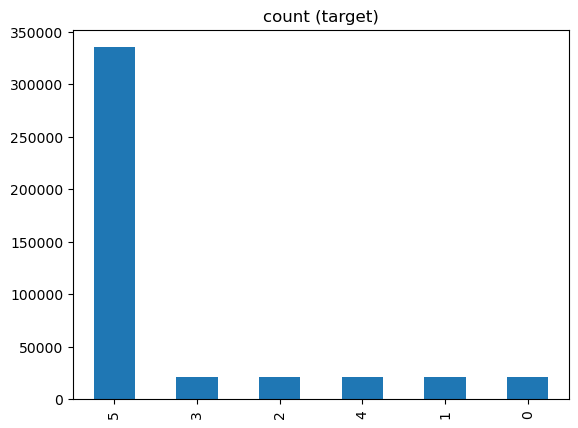

In [113]:
# plot the count after over-sampling
print("Total counts of classes:")
print(training_data_2['Race'].value_counts())
training_data_2['Race'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [114]:
X_test = testing_data.drop(['HeartDisease'], axis=1)
y_test = testing_data['HeartDisease']

X_train = training_data.drop(['HeartDisease'], axis=1)
y_train = training_data['HeartDisease']

X_train_2 = training_data_2.drop(['HeartDisease'], axis=1)
y_train_2 = training_data_2['HeartDisease']

X_train_list = [X_train, X_train_2]
y_train_list = [y_train, y_train_2]
# X_train_list = [X_train, X_train1, X_train2, X_train3, X_train4, X_train5]
# y_train_list = [y_train, y_train1, y_train2, y_train3, y_train4, y_train5]
data_desc = ['Imbalanced', 'Random Over-sampling']

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

Model accuracy score: 0.9112
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54938
           1       0.53      0.09      0.15      5406

    accuracy                           0.91     60344
   macro avg       0.72      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344

Confusion Matrix:


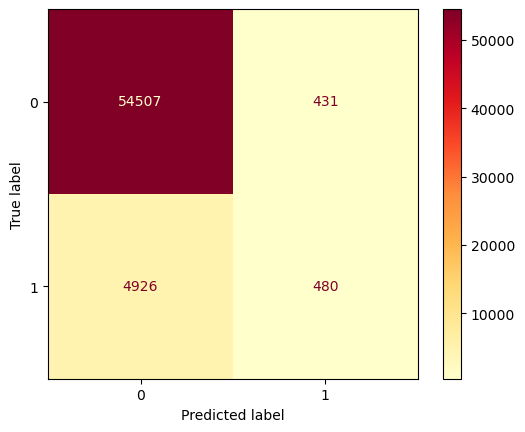

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM OVER-SAMPLING):

Model accuracy score: 0.9113
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54938
           1       0.53      0.09      0.16      5406

    accuracy                           0.91     60344
   macro avg       0.72      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344

Confusion Matrix:


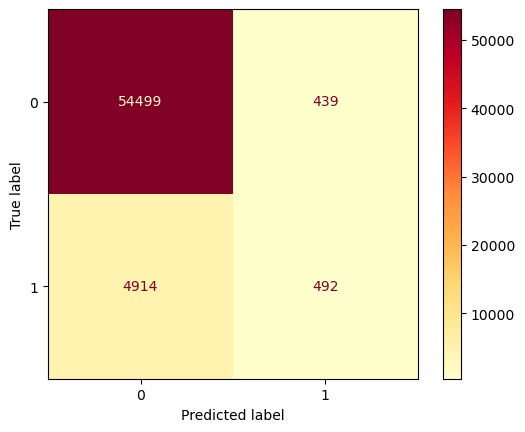

---------------------------------------------------------------------------


In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score 


for i in range(len(X_train_list)):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    
    # making model for logistic regression
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = clf_LR.predict(X_test)
    
    print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, pred)))
    print("Classification report:\n")
    print(classification_report(y_test,pred))
    
    print("Confusion Matrix:") 
    ConfusionMatrixDisplay.from_predictions(y_test, pred, cmap='YlOrRd')
    plt.show()
    print("---------------------------------------------------------------------------")

In [102]:
from sklearn.metrics import recall_score

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

241373 training examples
[0 0 1 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54938
           1       0.53      0.09      0.15      5406

    accuracy                           0.91     60344
   macro avg       0.72      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344



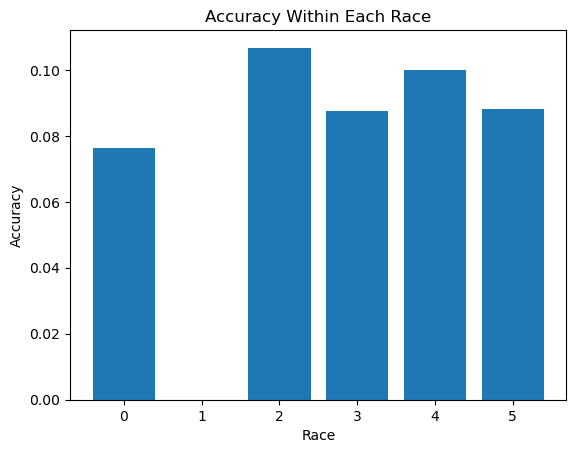

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM OVER-SAMPLING):

443499 training examples
[0 0 1 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54938
           1       0.53      0.09      0.16      5406

    accuracy                           0.91     60344
   macro avg       0.72      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344



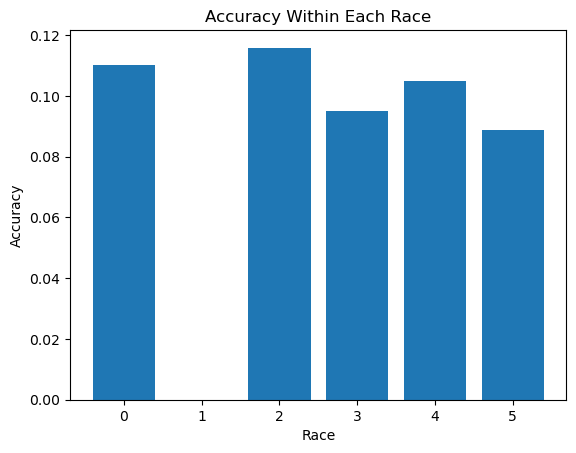

---------------------------------------------------------------------------


In [104]:
for i in range(len(X_train_list[0: ])):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = clf_LR.predict(X_test)
    print (pred)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")


### Stage 2

In [115]:
propor_2 = 1/5
race_proportions_2 = {5: propor_2, 3: propor_2, 2: propor_2, 4: propor_2, 1: propor_2, 0: propor_2}
race_proportions_2

{5: 0.2, 3: 0.2, 2: 0.2, 4: 0.2, 1: 0.2, 0: 0.2}

In [116]:
# Separate class
class_3_over = class_3.sample(counts[5], replace=True)
class_2_over = class_2.sample(counts[5], replace=True)
class_4_over = class_4.sample(counts[5], replace=True)
class_1_over = class_1.sample(counts[5], replace=True)
class_0_over = class_0.sample(counts[5], replace=True)

# training_data_2 = pd.concat([class_5, class_3, class_2_over, class_4_over, class_1_over, class_0_over], axis=0)
# training_data_2['Race'].value_counts()

In [117]:
training_data_3 = pd.concat([class_5, class_3_over, class_2_over, class_4_over, class_1_over, class_0_over], axis=0)
training_data_3['Race'].value_counts()

5    182276
3    182276
2    182276
4    182276
1    182276
0    182276
Name: Race, dtype: int64

Total counts of classes:
5    182276
3    182276
2    182276
4    182276
1    182276
0    182276
Name: Race, dtype: int64


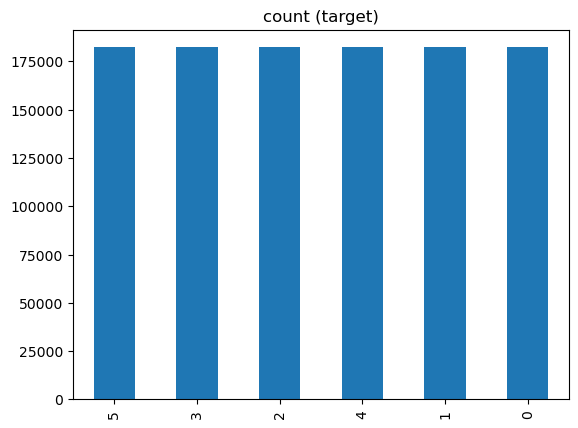

In [118]:
# plot the count after over-sampling
print("Total counts of classes:")
print(training_data_3['Race'].value_counts())
training_data_3['Race'].value_counts().plot(kind='bar', title='count (target)')
plt.show()

In [119]:
X_train_3 = training_data_3.drop(['HeartDisease'], axis=1)
y_train_3 = training_data_3['HeartDisease']

X_train_list = [X_train, X_train_2, X_train_3]
y_train_list = [y_train, y_train_2, y_train_3]

# X_train_list = [X_train, X_train1, X_train2, X_train3, X_train4, X_train5]
# y_train_list = [y_train, y_train1, y_train2, y_train3, y_train4, y_train5]
data_desc = ['Imbalanced', 'Random Over-sampling Stage 1', 'Random Over-sampling Stage 2']

---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 0 (IMBALANCED):

241373 training examples
[0 0 1 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54938
           1       0.53      0.09      0.15      5406

    accuracy                           0.91     60344
   macro avg       0.72      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344



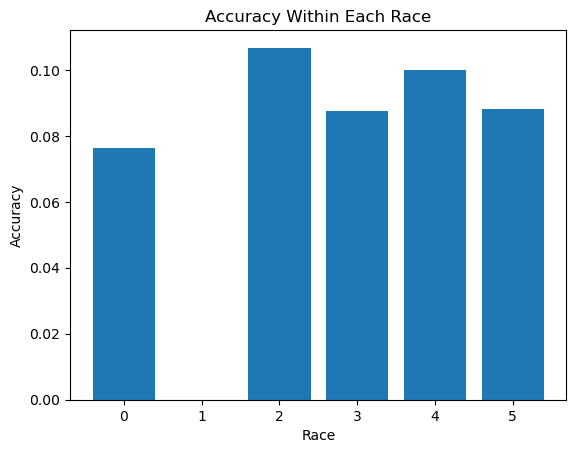

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 1 (RANDOM OVER-SAMPLING STAGE 1):

443499 training examples
[0 0 1 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54938
           1       0.53      0.09      0.15      5406

    accuracy                           0.91     60344
   macro avg       0.72      0.54      0.55     60344
weighted avg       0.88      0.91      0.88     60344



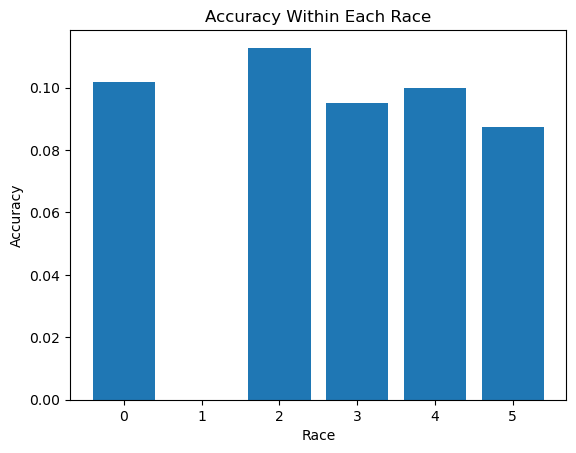

---------------------------------------------------------------------------
---------------------------------------------------------------------------
MODEL WITH TRAINING DATA 2 (RANDOM OVER-SAMPLING STAGE 2):

1093656 training examples
[0 0 0 ... 0 0 0]
Classification report:

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     54938
           1       0.53      0.10      0.16      5406

    accuracy                           0.91     60344
   macro avg       0.73      0.54      0.56     60344
weighted avg       0.88      0.91      0.88     60344



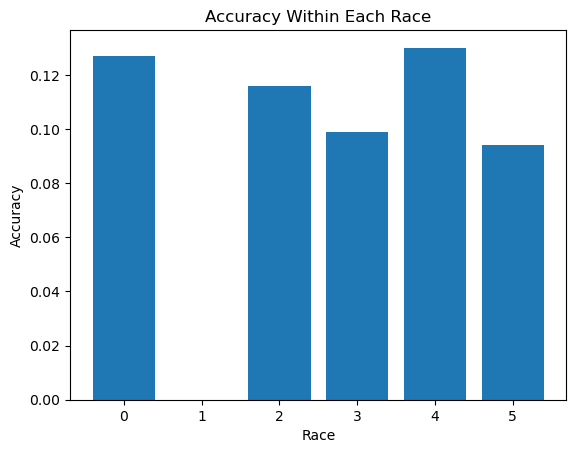

---------------------------------------------------------------------------


In [120]:
for i in range(len(X_train_list[0: ])):
    print("---------------------------------------------------------------------------")
    print(f"Model with training data {i} ({data_desc[i]}):\n".upper())
    print (str(X_train_list[i].shape[0]) + " training examples")
    
    # making model for logistic regression
    clf_LR= LogisticRegression(random_state=0).fit(X_train_list[i], y_train_list[i])
    pred = clf_LR.predict(X_test)
    print (pred)
    
    df = pd.DataFrame({
        'race': X_test["Race"],
        'predictions': pred,
        'ground_truth': y_test
    })

    print("Classification report:\n")
    print(classification_report(y_test,pred))

    tp_rate_by_race = df.groupby('race').apply(lambda x: recall_score(x['ground_truth'], x['predictions']))
    
    plt.bar(tp_rate_by_race.index, tp_rate_by_race)
    plt.xlabel('Race')
    plt.ylabel('Accuracy')
    plt.title('Accuracy Within Each Race')
    plt.show()
    print("---------------------------------------------------------------------------")
